In [1]:
import numpy as np
import networkx as nx
from timeit import timeit

In [2]:
import os
import sys
sys.path.insert(0, os.path.abspath('..'))
import madbayes as mb

In [3]:
def build_graph(N, p=0.3):
    nodes = [str(n) for n in range(N)]
    matrix = np.random.choice(a=[False, True], size=(N, N), p=[p, 1-p])
    for i in range(N):
        matrix[i, i] = False
    return mb.Graph(nodes, matrix)

In [4]:
params = [10, 25, 50, 100]
graphs = [build_graph(N) for N in params]
Gs = [graph.to_networkx() for graph in graphs]

In [5]:
# Invoke JIT for the first time
nop = mb.triangulate(graphs[0])

In [6]:
time0 = [timeit(lambda: mb.triangulate(graph), number=100) for graph in graphs]
time0

[0.09668995199899655,
 0.41422385400073836,
 2.9039076720000594,
 31.4656434750068]

In [7]:
time1 = [timeit(lambda: nx.complete_to_chordal_graph(G), number=100) for G in Gs]
time1

[0.10074633100157371,
 0.4055341779967421,
 1.4206143080009497,
 5.625000107997039]

In [8]:
%matplotlib inline  
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [9]:
x = np.arange(len(params))
width = 0.20

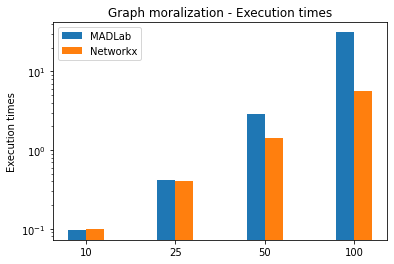

In [10]:
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, time0, width, label='MADLab')
rects2 = ax.bar(x + width/2, time1, width, label='Networkx')

plt.yscale('log')
ax.set_ylabel('Execution times')
ax.set_title('Graph moralization - Execution times')
ax.set_xticks(x)
ax.set_xticklabels(params)
ax.legend()

In [11]:
fig.tight_layout()
plt.show()